In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [3]:
dfc = pd.read_csv("tmdb_5000_credits.csv")
dfm = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
dfc['crew'].iloc[231]
dfm


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

<Axes: >

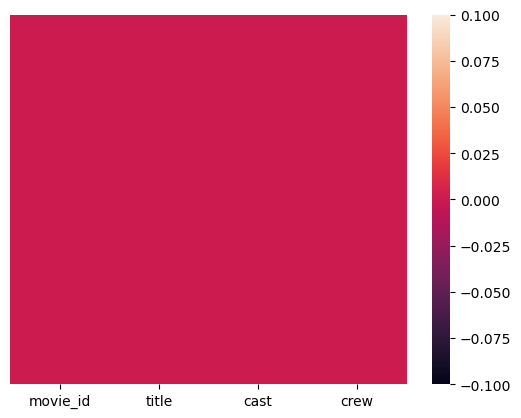

In [5]:
sns.heatmap(dfc.isnull(), yticklabels = False)

In [6]:
dfm['original_title'].value_counts().sample(6)

original_title
Mr. Church            1
Cruel Intentions      1
Stealing Harvard      1
Pootie Tang           1
Pink Ribbons, Inc.    1
Mighty Joe Young      1
Name: count, dtype: int64

In [7]:
dfm[dfm['original_language'] == 'id']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4326,1100000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.sonyclassics.com/theraid/,94329,"[{""id"": 9730, ""name"": ""crime boss""}, {""id"": 14...",id,Serbuan maut,Deep in the heart of Jakarta's slums lies an i...,40.285095,"[{""name"": ""Celluloid Dreams"", ""id"": 860}, {""na...","[{""iso_3166_1"": ""ID"", ""name"": ""Indonesia""}, {""...",2011-09-08,4105187,101.0,"[{""iso_639_1"": ""id"", ""name"": ""Bahasa indonesia""}]",Released,"1 Ruthless Crime Lord, 20 Elite Cops, 30 Floor...",The Raid,7.3,1055
4381,1000000,"[{""id"": 99, ""name"": ""Documentary""}]",http://theactofkilling.com/,123678,"[{""id"": 417, ""name"": ""corruption""}, {""id"": 609...",id,Jagal,In a place where killers are celebrated as her...,8.887411,"[{""name"": ""Spring Films"", ""id"": 9158}, {""name""...","[{""iso_3166_1"": ""DK"", ""name"": ""Denmark""}, {""is...",2012-08-31,444575,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"A story of killers who win, and the society th...",The Act of Killing,7.5,210


In [8]:
dfc[dfc['title'] == 'The Raid']

,movie_id,title,cast,crew
4326,94329,The Raid,"[{""cast_id"": 11, ""character"": ""Rama"", ""credit_...","[{""credit_id"": ""52fe49529251416c750c441d"", ""de..."


In [9]:
df = dfm.merge(dfc,on = 'title')

In [10]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

# **In a nutshell we have to make a content based recommender system**

In [12]:
# genres
# id  (for fetching the posters of movie)
# keywords
# title
# overview
# cast 
# crew
df = df[['id' , 'genres', 'keywords' , 'title' , 'overview' , 'cast' , 'crew']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4809 non-null   int64 
 1   genres    4809 non-null   object
 2   keywords  4809 non-null   object
 3   title     4809 non-null   object
 4   overview  4806 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [14]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [15]:
df.isnull().sum()

id          0
genres      0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [16]:
df.dropna(inplace = True)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [17]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [18]:
df.duplicated().sum()

0

In [19]:
df.iloc[0].genres  # json format

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [20]:
import ast 
def convert(object):
    l = []
    for i in ast.literal_eval(object):
        l.append(i['name'])  # here we pass key and get its value
    return l

In [21]:
convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [22]:
df['genres'] = df['genres'].apply(convert)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\3112467175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(convert)


In [23]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[Comedy, Romance]",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[Comedy, Drama, Romance, TV Movie]","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [24]:
df['keywords'] = df['keywords'].apply(convert)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\1092592694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['keywords'].apply(convert)


In [25]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[Comedy, Romance]",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [26]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [27]:
def convert3(obj):
    l = []
    count = 0 
    for i in ast.literal_eval(obj): # i here is representing each dictionary in the list of dictionaries
        if (count != 3):
            l.append(i['name'])
            count += 1
        else:
            break
    return l 

In [28]:
df['cast'] = df['cast'].apply(convert3)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\2227909799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].apply(convert3)


In [29]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[Comedy, Romance]",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [30]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [31]:
def fetch_dir(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [32]:
df['crew'] = df['crew'].apply(fetch_dir)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\566106186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crew'] = df['crew'].apply(fetch_dir)


In [33]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,"[Comedy, Romance]",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [72]:
df['overview']  = df['overview'].apply(lambda x : x.split())

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\2067810089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview']  = df['overview'].apply(lambda x : x.split())


In [74]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,"[Comedy, Romance]",[],Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,[],[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...","[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [78]:
df['genres'] = df['genres'].apply(lambda x :[i.replace(" " , "") for i in x])

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\854021598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(lambda x :[i.replace(" " , "") for i in x])


In [82]:
df['keywords'] = df['keywords'].apply(lambda x :[i.replace(" " , "") for i in x])

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\3072708566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['keywords'].apply(lambda x :[i.replace(" " , "") for i in x])


In [86]:
df['cast'] = df['cast'].apply(lambda x :[i.replace(" " , "") for i in x])

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\1905571291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].apply(lambda x :[i.replace(" " , "") for i in x])


In [88]:
df['crew'] = df['crew'].apply(lambda x :[i.replace(" " , "") for i in x])

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\3445886438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crew'] = df['crew'].apply(lambda x :[i.replace(" " , "") for i in x])


In [90]:
df

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4805,72766,"[Comedy, Romance]",[],Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4806,231617,"[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4807,126186,[],[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...","[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


In [92]:
df['tag'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\3892237443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']


In [94]:
df

,id,genres,keywords,title,overview,cast,crew,tag
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,"[Comedy, Romance]",[],Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,[],[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...","[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [96]:
df = df[['id' , 'tag' , 'title']]

In [98]:
df

,id,tag,title
0,19995,"[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar
1,285,"[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End
2,206647,"[A, cryptic, message, from, Bond’s, past, send...",Spectre
3,49026,"[Following, the, death, of, District, Attorney...",The Dark Knight Rises
4,49529,"[John, Carter, is, a, war-weary,, former, mili...",John Carter
...,...,...,...
4804,9367,"[El, Mariachi, just, wants, to, play, his, gui...",El Mariachi
4805,72766,"[A, newlywed, couple's, honeymoon, is, upended...",Newlyweds
4806,231617,"[""Signed,, Sealed,, Delivered"", introduces, a,...","Signed, Sealed, Delivered"
4807,126186,"[When, ambitious, New, York, attorney, Sam, is...",Shanghai Calling


In [108]:
df['tag'][0]


'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [104]:
df['tag'] = df['tag'].apply(lambda x : " ".join(x))

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\2355018695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag'] = df['tag'].apply(lambda x : " ".join(x))


In [106]:
df

,id,tag,title
0,19995,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,285,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,206647,A cryptic message from Bond’s past sends him o...,Spectre
3,49026,Following the death of District Attorney Harve...,The Dark Knight Rises
4,49529,"John Carter is a war-weary, former military ca...",John Carter
...,...,...,...
4804,9367,El Mariachi just wants to play his guitar and ...,El Mariachi
4805,72766,A newlywed couple's honeymoon is upended by th...,Newlyweds
4806,231617,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered"
4807,126186,When ambitious New York attorney Sam is sent t...,Shanghai Calling


In [114]:
df['tag'].dtype

dtype('O')

In [116]:
df['tag'] = df['tag'].apply(lambda x : x.lower())

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\2814169545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag'] = df['tag'].apply(lambda x : x.lower())


In [118]:
df

,id,tag,title
0,19995,"in the 22nd century, a paraplegic marine is di...",Avatar
1,285,"captain barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,206647,a cryptic message from bond’s past sends him o...,Spectre
3,49026,following the death of district attorney harve...,The Dark Knight Rises
4,49529,"john carter is a war-weary, former military ca...",John Carter
...,...,...,...
4804,9367,el mariachi just wants to play his guitar and ...,El Mariachi
4805,72766,a newlywed couple's honeymoon is upended by th...,Newlyweds
4806,231617,"""signed, sealed, delivered"" introduces a dedic...","Signed, Sealed, Delivered"
4807,126186,when ambitious new york attorney sam is sent t...,Shanghai Calling


# **Vectorization**

In [185]:
from sklearn.feature_extraction.text import CountVectorizer


In [187]:
cv = CountVectorizer(max_features = 5000 , stop_words = 'english')

In [189]:
vectors = cv.fit_transform(df['tag']).toarray()


In [191]:
vectors[0]  # this is the first movie of avatar

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
cv.get_feature_names_out()
# len(feature_names)

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [163]:
# !pip install nltk

In [165]:
import nltk

In [169]:
# now we are going to apply stemming on the dataset to remove similar words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [179]:
def stem(txt):
    l = []
    for i in txt.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [181]:
df['tag'] =df['tag'].apply(stem)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15560\1066146482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag'] =df['tag'].apply(stem)


In [275]:
df['id']

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4804      9367
4805     72766
4806    231617
4807    126186
4808     25975
Name: id, Length: 4806, dtype: int64

In [209]:
from sklearn.metrics.pairwise import cosine_similarity    # similarity is always between 0 - 1 1 means high similarity and vice versa


In [277]:
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

# index in the dataset and index of the respective movie on the website of tmdb are two different things

In [241]:
sorted(list(enumerate(similarity[0])),reverse = True,key = lambda x : x[1])  # to avoid losing index position

[(0, 1.0000000000000002),
 (1214, 0.28676966733820225),
 (2405, 0.26901379342448517),
 (3728, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574),
 (582, 0.24511108480187255),
 (1202, 0.24455799402225922),
 (1192, 0.2367785320221084),
 (61, 0.23179316248638276),
 (778, 0.23174488732966075),
 (4046, 0.2278389747471728),
 (1916, 0.2252817784447915),
 (2782, 0.21853668936906193),
 (172, 0.21239769762143662),
 (972, 0.2108663315950723),
 (322, 0.2105263157894737),
 (2329, 0.20443988269091456),
 (3606, 0.20437977982832192),
 (260, 0.20395079136182276),
 (151, 0.2029530274475215),
 (4190, 0.2029530274475215),
 (1440, 0.20277677641345318),
 (74, 0.2024645717996314),
 (1087, 0.2020475485519274),
 (3671, 0.1979082783981174),
 (973, 0.19767387315371682),
 (577, 0.1976738731537168),
 (47, 0.19672236884115843),
 (2969, 0.19252140716412977),
 (942, 0.19134594929397597),
 (495, 0.19088542889273336),
 (1199, 0.19088542889273336),
 (305, 0.19007487139298027),
 (4, 0.18929940971

In [255]:
def recommend(movie):
    movie_idx = df[df['title'] == movie].index[0]
    distances = similarity[movie_idx]
    movies_list = sorted(list(enumerate(distances)),reverse = True,key = lambda x : x[1])[1:6]
    for i in movies_list:
        print(df['title'].iloc[i[0]])
    


In [259]:
recommend('Batman Begins')


The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [253]:
df['title'].iloc[539]

'Titan A.E.'

In [261]:
import pickle

In [267]:
pickle.dump(df,open('movies.pkl','wb'))

In [269]:
pickle.dump(df.to_dict(),open('movies_dict.pkl','wb'))

In [271]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [282]:
df.iloc[0].id

19995